# CORRECTION SEANCE 4 - Comparaison de deux procédés

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Charger le CSV (après upload dans Colab)
df = pd.read_csv("comparaison_procedes.csv")

# 2) Vérifications rapides
print(df.shape)
print(df.columns)
df.head()


(50, 3)
Index(['piece', 'procédé_A', 'procédé_B'], dtype='object')


,piece,procédé_A,procédé_B
0,1,50.1,48.9
1,2,49.8,52.3
2,3,50.0,47.5
3,4,50.2,51.8
4,5,49.9,53.1


In [ ]:
#séparation des deux séries
A = df["procédé_A"]
B = df["procédé_B"]


In [ ]:
#tableau comparatif version ingénieur
resume = pd.DataFrame({
    "n": [A.count(), B.count()],
    "moyenne": [A.mean(), B.mean()],
    "médiane": [A.median(), B.median()],
    "variance (échant.)": [A.var(ddof=1), B.var(ddof=1)],
    "écart-type (échant.)": [A.std(ddof=1), B.std(ddof=1)],
    "min": [A.min(), B.min()],
    "Q1": [A.quantile(0.25), B.quantile(0.25)],
    "Q2 (médiane)": [A.quantile(0.50), B.quantile(0.50)],
    "Q3": [A.quantile(0.75), B.quantile(0.75)],
    "max": [A.max(), B.max()],
})

resume.index = ["Procédé A", "Procédé B"]
resume


,n,moyenne,médiane,variance (échant.),écart-type (échant.),min,Q1,Q2 (médiane),Q3,max
Procédé A,50,50.000,50.00,0.026531,0.162882,49.7,49.900,50.00,50.100,50.3
Procédé B,50,50.184,50.55,8.579331,2.929049,45.7,47.425,50.55,52.675,54.8


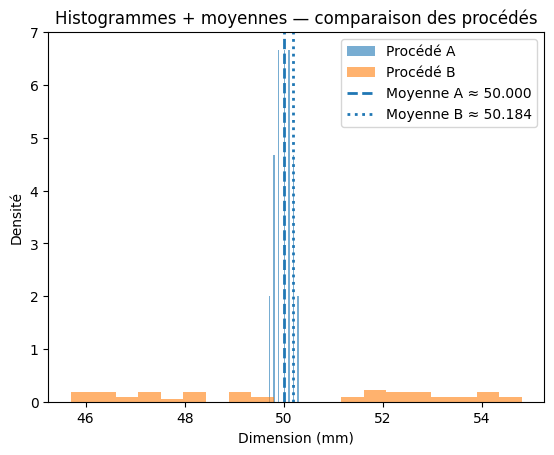

In [ ]:
#histogrammes comparatifs
mean_A, mean_B = A.mean(), B.mean()

plt.hist(A, bins=20, alpha=0.6, label="Procédé A", density=True)
plt.hist(B, bins=20, alpha=0.6, label="Procédé B", density=True)

plt.axvline(mean_A, linestyle="--", linewidth=2, label=f"Moyenne A ≈ {mean_A:.3f}")
plt.axvline(mean_B, linestyle=":", linewidth=2, label=f"Moyenne B ≈ {mean_B:.3f}")

plt.xlabel("Dimension (mm)")
plt.ylabel("Densité")
plt.title("Histogrammes + moyennes — comparaison des procédés")
plt.legend()
plt.show()



/tmp/ipython-input-940751879.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([A, B], labels=["Procédé A", "Procédé B"])


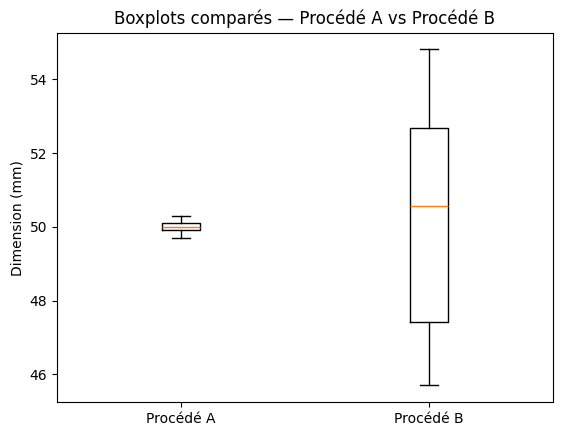

In [ ]:
plt.boxplot([A, B], labels=["Procédé A", "Procédé B"])
plt.ylabel("Dimension (mm)")
plt.title("Boxplots comparés — Procédé A vs Procédé B")
plt.show()


In [ ]:
#quartiles calcul des bornes des moustaches et valeurs extrêmes
def iqr_outliers(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    out = s[(s < low) | (s > high)]
    return q1, q3, iqr, low, high, out

q1A, q3A, iqrA, lowA, highA, outA = iqr_outliers(A)
q1B, q3B, iqrB, lowB, highB, outB = iqr_outliers(B)

print("Procédé A — IQR:", iqrA, "Bornes:", (lowA, highA), "Nb outliers:", len(outA))
print("Procédé B — IQR:", iqrB, "Bornes:", (lowB, highB), "Nb outliers:", len(outB))
outA, outB


Procédé A — IQR: 0.20000000000000284 Bornes: (np.float64(49.599999999999994), np.float64(50.400000000000006)) Nb outliers: 0
Procédé B — IQR: 5.250000000000007 Bornes: (np.float64(39.54999999999998), np.float64(60.55000000000001)) Nb outliers: 0


(Series([], Name: procédé_A, dtype: float64),
 Series([], Name: procédé_B, dtype: float64))

## Correction — Argumentaire de comparaison des procédés

L’analyse statistique porte sur la comparaison de deux procédés de fabrication à partir de mesures de dimension réalisées sur 50 pièces.

Tout d’abord, les **moyennes** des deux procédés sont très proches, ce qui indique que, en moyenne, les deux procédés produisent des pièces de dimension comparable. La **médiane** est également proche de la moyenne pour les deux séries, ce qui suggère une distribution globalement équilibrée et l’absence de biais systématique majeur.

Cependant, l’analyse des **paramètres de dispersion** met en évidence une différence importante entre les deux procédés. Le procédé A présente un **écart-type faible**, traduisant une faible variabilité des dimensions autour de la valeur moyenne. À l’inverse, le procédé B possède un **écart-type nettement plus élevé**, ce qui indique une forte dispersion des valeurs mesurées.

Cette observation est confirmée par l’étude des **quartiles** et de l’**intervalle interquartile**. Pour le procédé A, les quartiles sont rapprochés, ce qui signifie que 50 % des valeurs centrales sont concentrées dans un intervalle étroit. Pour le procédé B, l’intervalle interquartile est beaucoup plus large, révélant une variabilité importante au cœur même de la distribution.

Les **représentations graphiques** renforcent ces conclusions. Les histogrammes montrent une distribution étroite pour le procédé A et beaucoup plus étalée pour le procédé B. Les diagrammes en moustache mettent en évidence une dispersion plus forte pour le procédé B, ainsi que la présence de valeurs éloignées de la médiane, susceptibles de correspondre à des incidents ou à des dérives ponctuelles du procédé.

D’un point de vue industriel, même si les deux procédés présentent une performance moyenne comparable, le **procédé A est clairement plus maîtrisé**. Sa faible dispersion le rend plus prévisible, plus stable et plus compatible avec des tolérances dimensionnelles strictes. Le procédé B, en revanche, présente un risque accru de non-conformités, de retouches ou de rebuts en raison de sa variabilité élevée.

**Conclusion :**  
Sur la base des indicateurs statistiques et des représentations graphiques, le procédé A est à privilégier pour une production industrielle fiable et maîtrisée. La moyenne seule ne constitue pas un critère suffisant de décision ; l’analyse de la dispersion est essentielle dans une démarche d’ingénierie et de contrôle qualité.
